In [1]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [2]:
# https://datascience.quantecon.org/tools/maps.html#get-the-map
# https://geopandas.org/en/latest/docs/user_guide/fiona_to_pyogrio.html#migration-from-the-fiona-to-the-pyogrio-read-write-engine
# https://data-osi.opendata.arcgis.com/datasets/osi::counties-national-statutory-boundaries-2019-generalised-20m/about
file_path = "./data/Counties___OSi_National_Statutory_Boundaries___Generalised_20m_-6920972630406172930.geojson"

ireland = geopandas.read_file(file_path, engine="pyogrio")
print(ireland.columns)
ireland.head()

Index(['CO_ID', 'ENGLISH', 'GAEILGE', 'LOGAINM_ID', 'GUID', 'CONTAE', 'COUNTY',
       'PROVINCE', 'CENTROID_X', 'CENTROID_Y', 'AREA', 'ESRI_OID', 'geometry'],
      dtype='object')


,CO_ID,ENGLISH,GAEILGE,LOGAINM_ID,GUID,CONTAE,COUNTY,PROVINCE,CENTROID_X,CENTROID_Y,AREA,ESRI_OID,geometry
0,50000,DONEGAL,Dún na nGall,100013,2ae19629-1452-13a3-e055-000000000001,Dún na nGall,DONEGAL,Ulster,607296.31,911848.45,4.860754e+09,1,"MULTIPOLYGON (((-8.08205 55.16002, -8.08180 55..."
1,120000,LIMERICK,Luimneach,100022,2ae19629-1440-13a3-e055-000000000001,Luimneach,LIMERICK,Munster,548318.75,640943.05,2.754926e+09,2,"POLYGON ((-8.50899 52.74616, -8.50808 52.74812..."
2,80000,KILDARE,Cill Dara,100007,2ae19629-1455-13a3-e055-000000000001,Cill Dara,KILDARE,Leinster,678993.60,712090.40,1.694083e+09,3,"POLYGON ((-6.49499 53.35338, -6.49314 53.35335..."
3,220000,WATERFORD,Port Láirge,100026,2ae19629-144b-13a3-e055-000000000001,Port Láirge,WATERFORD,Munster,630336.80,599955.37,1.857038e+09,4,"MULTIPOLYGON (((-7.59463 52.09696, -7.58791 52..."
4,260000,DUBLIN,Baile Átha Cliath,100002,2ae19629-144f-13a3-e055-000000000001,Baile Átha Cliath,DUBLIN,Leinster,714929.28,740960.44,9.257609e+08,5,"MULTIPOLYGON (((-6.44953 53.39354, -6.44813 53..."


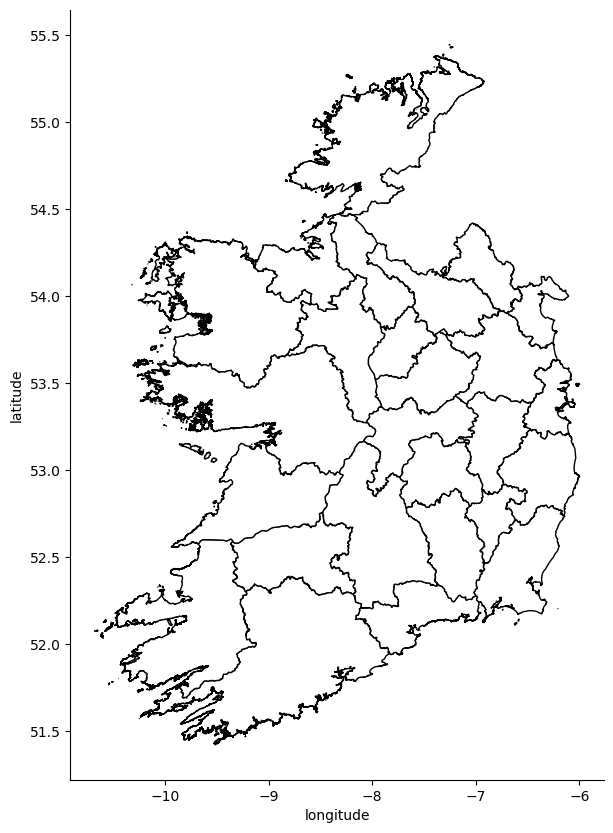

In [3]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
ireland.plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [4]:
station_details = "./data/met_eireann_station_details.csv"

df = pd.read_csv(station_details)

df.head()

,county,station name,name,height(m),easting,northing,latitude,longitude,open year,close year,hourly data url,daily data url,monthly data url
0,Galway,1875,ATHENRY,40,147659,226804,53.28917,-8.78556,2010,(null),https://cli.fusio.net/cli/climate_data/webdata...,https://cli.fusio.net/cli/climate_data/webdata...,https://cli.fusio.net/cli/climate_data/webdata...
1,Cavan,675,BALLYHAISE,78,245200,311600,54.05139,-7.30972,2003,(null),https://cli.fusio.net/cli/climate_data/webdata...,https://cli.fusio.net/cli/climate_data/webdata...,https://cli.fusio.net/cli/climate_data/webdata...
2,Mayo,2375,BELMULLET,9,69170,332818,54.22750,-10.00694,2012,(null),https://cli.fusio.net/cli/climate_data/webdata...,https://cli.fusio.net/cli/climate_data/webdata...,https://cli.fusio.net/cli/climate_data/webdata...
3,Dublin,3723,CASEMENT,91,304100,229500,53.30556,-6.43889,1944,(null),https://cli.fusio.net/cli/climate_data/webdata...,https://cli.fusio.net/cli/climate_data/webdata...,https://cli.fusio.net/cli/climate_data/webdata...
4,Mayo,2175,CLAREMORRIS,68,134523,273883,53.71083,-8.99250,2010,(null),https://cli.fusio.net/cli/climate_data/webdata...,https://cli.fusio.net/cli/climate_data/webdata...,https://cli.fusio.net/cli/climate_data/webdata...


In [5]:
# Add coordinates to dataframe.
# https://datascience.quantecon.org/tools/maps.html#id1
df["coordinates"] = list(zip(df.longitude, df.latitude))

df["coordinates"] = df["coordinates"].apply(Point)

df.head()

,county,station name,name,height(m),easting,northing,latitude,longitude,open year,close year,hourly data url,daily data url,monthly data url,coordinates
0,Galway,1875,ATHENRY,40,147659,226804,53.28917,-8.78556,2010,(null),https://cli.fusio.net/cli/climate_data/webdata...,https://cli.fusio.net/cli/climate_data/webdata...,https://cli.fusio.net/cli/climate_data/webdata...,POINT (-8.78556 53.28917)
1,Cavan,675,BALLYHAISE,78,245200,311600,54.05139,-7.30972,2003,(null),https://cli.fusio.net/cli/climate_data/webdata...,https://cli.fusio.net/cli/climate_data/webdata...,https://cli.fusio.net/cli/climate_data/webdata...,POINT (-7.30972 54.05139)
2,Mayo,2375,BELMULLET,9,69170,332818,54.22750,-10.00694,2012,(null),https://cli.fusio.net/cli/climate_data/webdata...,https://cli.fusio.net/cli/climate_data/webdata...,https://cli.fusio.net/cli/climate_data/webdata...,POINT (-10.00694 54.2275)
3,Dublin,3723,CASEMENT,91,304100,229500,53.30556,-6.43889,1944,(null),https://cli.fusio.net/cli/climate_data/webdata...,https://cli.fusio.net/cli/climate_data/webdata...,https://cli.fusio.net/cli/climate_data/webdata...,POINT (-6.43889 53.30556)
4,Mayo,2175,CLAREMORRIS,68,134523,273883,53.71083,-8.99250,2010,(null),https://cli.fusio.net/cli/climate_data/webdata...,https://cli.fusio.net/cli/climate_data/webdata...,https://cli.fusio.net/cli/climate_data/webdata...,POINT (-8.9925 53.71083)


In [6]:
station_df = geopandas.GeoDataFrame(df, geometry="coordinates")

station_df.head()

,county,station name,name,height(m),easting,northing,latitude,longitude,open year,close year,hourly data url,daily data url,monthly data url,coordinates
0,Galway,1875,ATHENRY,40,147659,226804,53.28917,-8.78556,2010,(null),https://cli.fusio.net/cli/climate_data/webdata...,https://cli.fusio.net/cli/climate_data/webdata...,https://cli.fusio.net/cli/climate_data/webdata...,POINT (-8.78556 53.28917)
1,Cavan,675,BALLYHAISE,78,245200,311600,54.05139,-7.30972,2003,(null),https://cli.fusio.net/cli/climate_data/webdata...,https://cli.fusio.net/cli/climate_data/webdata...,https://cli.fusio.net/cli/climate_data/webdata...,POINT (-7.30972 54.05139)
2,Mayo,2375,BELMULLET,9,69170,332818,54.22750,-10.00694,2012,(null),https://cli.fusio.net/cli/climate_data/webdata...,https://cli.fusio.net/cli/climate_data/webdata...,https://cli.fusio.net/cli/climate_data/webdata...,POINT (-10.00694 54.22750)
3,Dublin,3723,CASEMENT,91,304100,229500,53.30556,-6.43889,1944,(null),https://cli.fusio.net/cli/climate_data/webdata...,https://cli.fusio.net/cli/climate_data/webdata...,https://cli.fusio.net/cli/climate_data/webdata...,POINT (-6.43889 53.30556)
4,Mayo,2175,CLAREMORRIS,68,134523,273883,53.71083,-8.99250,2010,(null),https://cli.fusio.net/cli/climate_data/webdata...,https://cli.fusio.net/cli/climate_data/webdata...,https://cli.fusio.net/cli/climate_data/webdata...,POINT (-8.99250 53.71083)


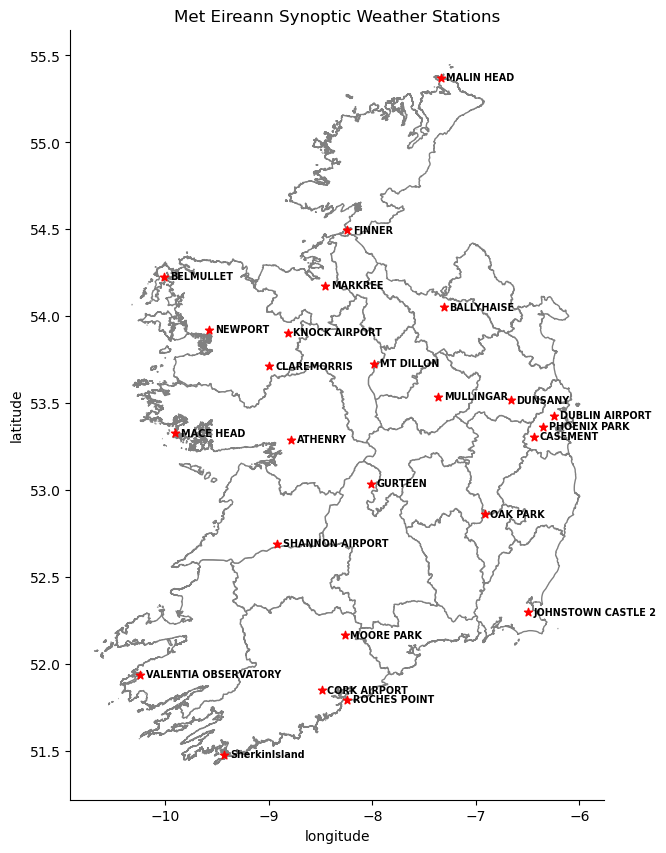

In [65]:
#https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.set_crs.html
station_df = station_df.set_crs(4326, allow_override=True)

#https://geopandas.org/en/stable/docs/user_guide/mapping.html#maps-with-layers
fig, gax = plt.subplots(figsize=(10, 10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
base = ireland.plot(ax=gax, edgecolor='gray',color='white')

station_df.plot(ax=base, marker='*', color='red')



# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Met Eireann Synoptic Weather Stations')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

# Label the cities
for x, y, label in zip(station_df['coordinates'].x, station_df['coordinates'].y, station_df['name']):
    gax.annotate(label, xy=(x,y), xytext=(4, -2), textcoords='offset points', size='x-small', weight='bold')

plt.show()

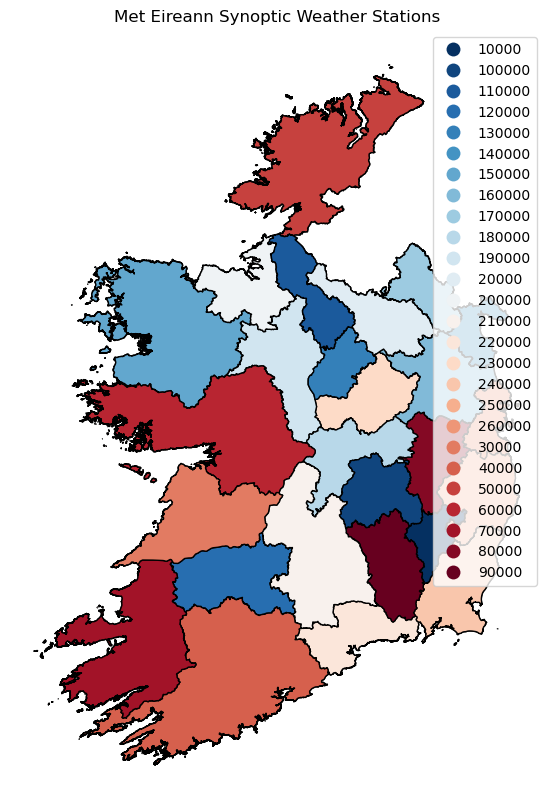

In [8]:
fig, gax = plt.subplots(figsize=(10, 10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
ireland.plot(ax=gax, edgecolor='black',color='white')

ireland.plot(ax=gax, edgecolor='black', column='CO_ID', legend=True, cmap='RdBu_r')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Met Eireann Synoptic Weather Stations')

#gax.spines['top'].set_visible(False)
#gax.spines['right'].set_visible(False)

plt.axis('off')

plt.show()